In [129]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)

In [130]:
def sigmoid(h, x1, x2):
    # print(1/(1 + np.exp(-h[0] - h[1]*x1 - h[2]*x2)))
    return 1/(1 + np.exp(-h[0] - h[1]*x1 - h[2]*x2))

In [131]:
def giveCost(h, x1, x2, y, batch_size):
    return (1/batch_size) * np.sum(-y * np.log10(sigmoid(h, x1, x2)) - (1 - y) * np.log10(1 - sigmoid(h, x1, x2)))

In [132]:
def giveProbability(x1, x2, h):
    return sigmoid(h, x1, x2)

In [133]:
def predict(x1, x2, h):
    pred = giveProbability(x1, x2, h) >= 0.5
    return pred

In [134]:
def giveAccuracy(x1, x2, y, h):
    absError = np.sum(abs(giveProbability(x1, x2, h) - y))
    return 100*(1 - absError/len(y))

Probability : 0.943599
Prediction : 1.000000
Accuracy of Model : 89.345032
Cost : 0.123124
Params : [-59.81146937   0.48542607   0.47981768]


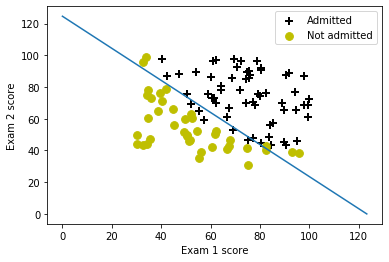

In [138]:
# Logistic Regression using Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

# Load data from txt file into a matrix
dataLoad = np.loadtxt('data1.txt', delimiter = ',')

# Model
# 1/(1 + e**(-z))
# z = w0 + w1*x1 + w2* x2
data = dataLoad.transpose()
x1 = data[0]
x2 = data[1]
y = data[2]

converged = False
h_prev = np.zeros(3)
h = np.zeros(3)
alpha = 0.01
batch_size = 100
epsilon = 0.000004
iter = 0

while not converged:
    h_prev[0] = h[0] - (alpha)/(batch_size)*np.sum((sigmoid(h, x1, x2) - y))
    h_prev[1] = h[1] - (alpha)/(batch_size)*np.sum((sigmoid(h, x1, x2) - y)*x1)
    h_prev[2] = h[2] - (alpha)/(batch_size)*np.sum((sigmoid(h, x1, x2) - y)*x2)
    
    if (abs(h - h_prev) < epsilon).all():
        converged = True
        
    h[0] = h_prev[0]
    h[1] = h_prev[1]
    h[2] = h_prev[2]
    # print("Weights : %f %f %f" %(h[0], h[1], h[2]))
    iter = iter + 1
    if iter > 200000:
        alpha = 0.001

# -58.495798 0.457390 0.453144
print("Probability : %f" %giveProbability(45, 85, h))
print("Prediction : %f" %predict(45, 85, h))
print("Accuracy of Model : %f" %giveAccuracy(x1, x2, y, h))
print("Cost : %f" %giveCost(h, x1, x2, y, batch_size))
print("Params : " + str(h))

plt.plot([0, -h[0]/h[1]], [-h[0]/h[2], 0])
plotData(dataLoad, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

Probability : 0.775286
Prediction : 1.000000
Accuracy of Model : 89.000000
Cost : 0.088379
Params : [-25.05219314   0.20535491   0.2005838 ]


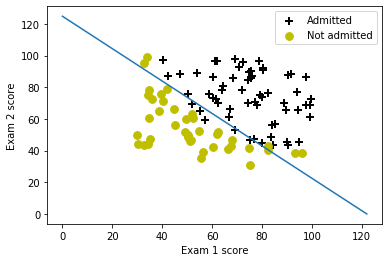

In [144]:
# Logistic Regression using library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load data from txt file into a matrix
dataLoad = np.loadtxt('data1.txt', delimiter = ',')

batch_size = 100
data = dataLoad.transpose()
X = data[0:2,:]
y = data[2]
X = X.transpose()

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X, y)
out = clf.decision_function(X)
out = np.array(out[0:3])
out = np.reshape(out, (3,-1))

A = np.array([[1], [1], [1]]);
A = np.concatenate((A, dataLoad[0:3,0:2]), axis=1)

h = np.matmul(np.linalg.inv(A), out)
h = h.flatten()

print("Probability : %f" %giveProbability(45, 85, h))
print("Prediction : %f" %predict(45, 85, h))
print("Accuracy of Model : %f" %(100*clf.score(X, y)))
print("Cost : %f" %giveCost(h, data[0:1,:].flatten(), data[1:2,:].flatten(), y, batch_size))
print("Params : " + str(h))

plt.plot([0, -h[0]/h[1]], [-h[0]/h[2], 0])
plotData(dataLoad, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

Accuracy of Model : 83.050847
Params : [ 1.27272323  0.6252004   1.18110372 -2.01998737 -0.91742254 -1.43161951
  0.12400767 -0.365546   -0.3572358  -0.1751774  -1.45813451 -0.05090794
 -0.61553133 -0.27468459 -1.19285084 -0.2421593  -0.20600927 -0.04468342
 -0.27778635 -0.2953782  -0.45635884 -1.0431396   0.0278215  -0.29241972
  0.01561354 -0.32737561 -0.1438603  -0.92464174]


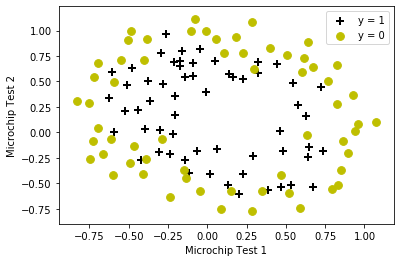

In [175]:
# Regularised Logistic Regression using library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load data from txt file into a matrix
data = np.loadtxt('data2.txt', delimiter = ',')

batch_size = len(data[:,0])

x1 = data[:,0:1]
x2 = data[:,1:2]
y = data[:,2:3]
y = y.flatten()

X = np.ones((batch_size, 1), dtype=float)
X = np.concatenate((X, x1), axis=1)
X = np.concatenate((X, x2), axis=1)
X = np.concatenate((X, x1**2), axis=1)
X = np.concatenate((X, x1*x2), axis=1)
X = np.concatenate((X, x2**2), axis=1)
X = np.concatenate((X, x1**3), axis=1)
X = np.concatenate((X, x1**2*x2), axis=1)
X = np.concatenate((X, x1*x2**2), axis=1)
X = np.concatenate((X, x2**3), axis=1)
X = np.concatenate((X, x1**4), axis=1)
X = np.concatenate((X, x1**3*x2), axis=1)
X = np.concatenate((X, x1**2*x2**2), axis=1)
X = np.concatenate((X, x1*x2**3), axis=1)
X = np.concatenate((X, x2**4), axis=1)
X = np.concatenate((X, x1**5), axis=1)
X = np.concatenate((X, x1**4*x2), axis=1)
X = np.concatenate((X, x1**3*x2**2), axis=1)
X = np.concatenate((X, x1**2*x2**3), axis=1)
X = np.concatenate((X, x1*x2**4), axis=1)
X = np.concatenate((X, x2**5), axis=1)
X = np.concatenate((X, x1**6), axis=1)
X = np.concatenate((X, x1**5*x2), axis=1)
X = np.concatenate((X, x1**4*x2**2), axis=1)
X = np.concatenate((X, x1**3*x2**3), axis=1)
X = np.concatenate((X, x1**2*x2**4), axis=1)
X = np.concatenate((X, x1*x2**5), axis=1)
X = np.concatenate((X, x2**6), axis=1)

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000000000, penalty='l2').fit(X, y)
out = clf.decision_function(X)
out = np.array(out[0:28])
out = np.reshape(out, (28,-1))

A = X[0:28,:]

h = np.matmul(np.linalg.inv(A), out)
h = h.flatten()

print("Accuracy of Model : %f" %(100*clf.score(X, y)))
print("Params : " + str(h))


plotData(dataLoad, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
# Plot decision boundary here